In [1]:
!wget https://shorturl.at/BLXZ5 -O spam.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
df = pd.read_csv("D:\DATA SCIENCE COURSE\Datacience_Class\Data\spam.csv")
df.head()


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2420\3219719008.py:2: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\DATA SCIENCE COURSE\Datacience_Class\Data\spam.csv")


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

# **Steps :-**
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model building
5. Evaluation
6. Improvement
7. Website
8. Deploy

## **Data Cleaning :-**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# renaming the columns
df.rename(columns={'Category':'Target'}, inplace=True)

In [7]:
df.head(5)

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit_transform(df['Target'])

array([0, 0, 1, ..., 0, 0, 0])

In [9]:
df['Target'] = encoder.fit_transform(df['Target'])


In [10]:
df.head(5)

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


* 0 means ham messages .
* 1 means spam messages .

In [11]:
# checking missing values
df.isnull().sum()

Target     0
Message    0
dtype: int64

There is no missing values in both Target and Message columns . So, we don't need to do anything here.

In [12]:
# checking duplicates values
df.duplicated().sum()

415

There is 415 values are duplicated so we will simply drop duplicated value.

In [13]:
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5157, 2)

## **EDA :-**

In [16]:
# How many messages are spam or ham ?

In [17]:
df.head(5)

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['Target'].value_counts()

Target
0    4516
1     641
Name: count, dtype: int64

So, here is 4516 are ham messages and 641 are spam messages .

In [19]:
# visualizing the data
from matplotlib import pyplot as plt

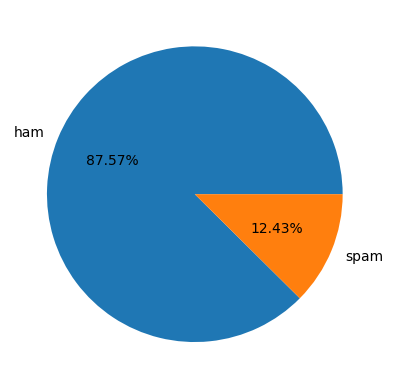

In [20]:
plt.pie(df['Target'].value_counts(), labels=['ham','spam'], autopct='%.2f%%')
plt.show()

This Pie chart shows,
* 87.57% data are ham .
* 12.43% data are spam .

So, here data is imbalanced so we neeed to balance it.

In [21]:
import nltk

In [22]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['Message'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: Message, Length: 5157, dtype: int64

In [25]:
# adding new coulmn which will show the no.of characteristics
df['num_characters'] = df['Message'].apply(len)

In [26]:
df.head()

,Target,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# fetching the number of words
import nltk


In [28]:
# word tokenization

In [29]:
df['Message'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5157, dtype: object

In [30]:
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,Target,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
# sentence tokenizaition
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,Target,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# we can analyze ham and spam messages diferently
# This one for ham messages
df[df['Target'] == 0] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# This is for spam messages
df[df['Target'] == 1] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [37]:
from matplotlib import pyplot as plt
import seaborn as sns

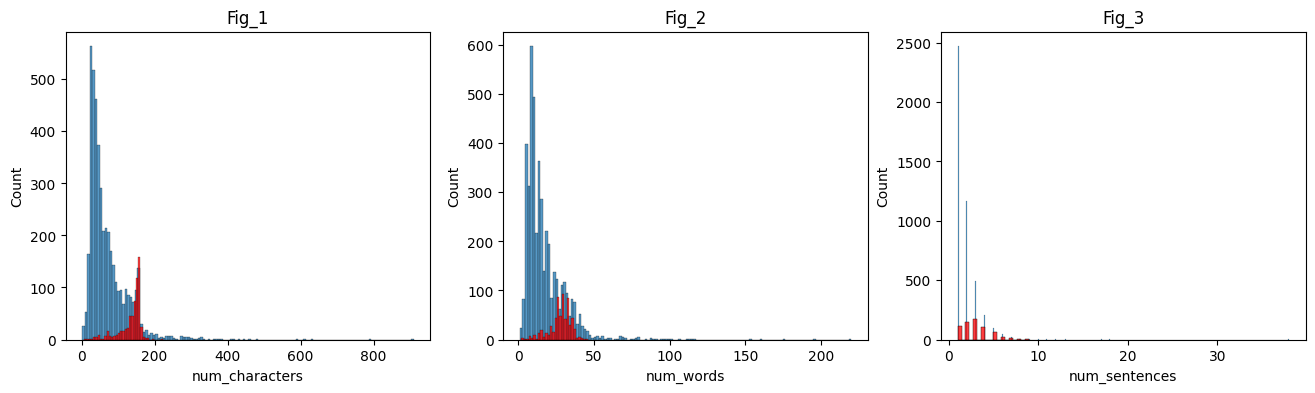

In [38]:
# plotting the histogram for number of characteristics column
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'], color='red')
plt.title("Fig_1")

plt.subplot(1,3,2)
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'], color='red')
plt.title("Fig_2")

plt.subplot(1,3,3)
sns.histplot(df[df['Target']==0]['num_sentences'])
sns.histplot(df[df['Target']==1]['num_sentences'], color='red')
plt.title("Fig_3")
plt.show()

Fig_1 shows,
* most of the ham messages is made from more characters .
* most of the spam message is made from less characters.

Fig_2 shows,
* most of the ham messages is made from more words.
* most of the spam messages is made from less words.

Fig_3 shows,
* most of the ham messages is made from less sentences.
* most of the spam messages is made from more sentences.


In [41]:
df.corr()

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [42]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In this num_characres are more tendency to target so we will drop other two column . i.e, num_words and num_sentences.

# **Data Preprocessing**
1. Lower Case
2. Tokenization
3. Removing special characters
4. Removing stop words andd punctuation
5. Stemming

In [52]:
from nltk.corpus import stopwords
import string
string.punctuation
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [53]:
def transform_text(text):
    text = text.lower()
    return text

In [54]:
transform_text("Hi how Are you")

'hi how are you'

In [55]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    return text

In [56]:
transform_text("Hi How Are YoU")

['hi', 'how', 'are', 'you']

In [59]:
# let's wirte entire function together
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
   
        
    return y

In [60]:
transform_text('I loved the YT lectures on Machine Learning. How about you?')

['loved', 'yt', 'lectures', 'machine', 'learning']

In [61]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [62]:
# let's wirte entire function together
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i  in text:
        y.append(ps.stem(i))
        
        
    return" ".join(y)

In [63]:
transform_text('I loved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [65]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [69]:
df['text'].apply(transform_text)

KeyError: 'text'